<a href="https://colab.research.google.com/github/AleksandrMac/learning/blob/main/ai/hw/16_3_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

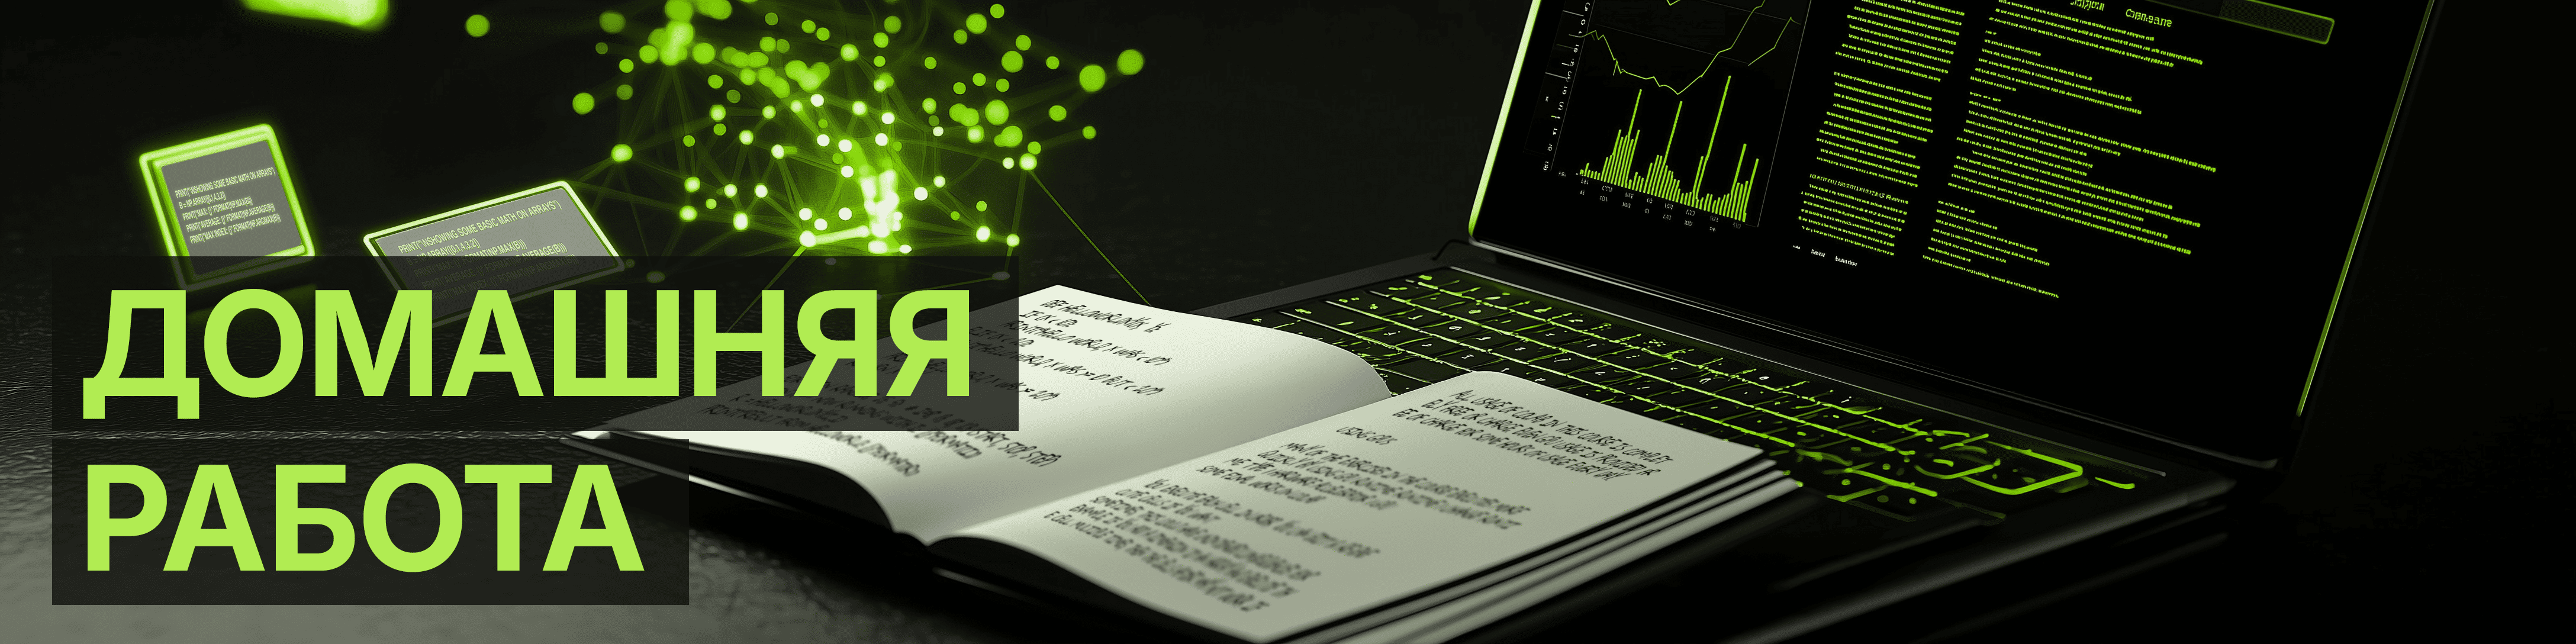

**Навигация по уроку**

1. [Задачи машинного зрения на OpenCV](https://colab.research.google.com/drive/1x1rxbNfV1ft1ztIPwxA3q34J4MULix5A)
2. [OpenCV. Распознавание лиц (практика)](https://colab.research.google.com/drive/1GwMZ8BAjtdKBDA5S0lAX1OPMFmIaYhqL)
3. Домашняя работа


Используя знания из практической части урока и функцию `blur_face` (размытие), проведите следующий эксперимент:
1. Найдите фото любого известного актера или актрисы.
2. Распознайте лицо на фотографии. Выделите лицо овалом. Какой метод для рисования овала использовать, вы должны найти самостоятельно.
3. Выделите на изображении глаза. Выделите их кружком. Если вы чувствуете в себе суперсилу и дополнительный бекграунд знаний, и хотите получить больше баллов за задание, то нарисуйте вместо кружков солнцезащитные очки (картинку очков можно найти в интернете, задача их правильно масштабировать и разместить).
4. Все лицо кроме глаз необходимо "заблюрить" (размыть) с помощью функции `blur_face` (функция объявлена ниже).




Оценка за задание:
* 1 балл - задача решена с помощью куратора, лицо распознано прямоугольником, глаза кругом.
* 2 балла - задача решена с незначительными подсказками куратора, лицо распознано прямоугольником или кругом, глаза кругом, лицо размыто.
* 3 балла - задача решена самостоятельно, лицо распознано овалом, глаза кругом, удалось заблюрить лицо, не затронув глаза.
* 4 балла - задача решена самостоятельно на 3 балла, удалось нарисовать очки с подсказкой куратора, недостаточна соблюдена симметрия расположения очков или недостаточно учтены их размеры.
* 5 баллов - задача полностью решена самостоятельно, все пункты выполнены.

In [1]:
import cv2
from cv2 import CascadeClassifier

def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)



In [2]:
# Ваше решение
import gdown
gdown.download('https://img.riamediabank.ru/images/vol2%2Fmedia%2Foriginal%2Fold%2F277%2F90%2F2779083_hires_0%3A0%3A0%3A0_1400x1000_80_9_1_0JXQutCw0YLQtdGA0LjQvdCwINCn0LXRgdC90L7QutC%2B0LLQsCAjMjc3OTA4Mw%3D%3D_75%3A89_2779083-rus_ria-2779083-preview_f24f3f5ffb5f20ab1dec5a81bb4d9274.jpg', 'photo.jpg', quiet=True)

'photo.jpg'

In [43]:
class FaceEyeDetector:
    def __init__(self, face_cascade_path=None, eye_cascade_path=None):
        if face_cascade_path is None:
            face_cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
        if eye_cascade_path is None:
            eye_cascade_path = cv2.data.haarcascades + "haarcascade_eye.xml"

        self.face_cascade = cv2.CascadeClassifier(face_cascade_path)
        self.eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

        if self.face_cascade.empty() or self.eye_cascade.empty():
            raise IOError("Не удалось загрузить каскады Хаара.")

    def detect(self, image):
        """
        Обнаруживает лица и глаза на изображении.

        Возвращает список словарей:
        [
            {
                'face': (x, y, w, h),
                'eyes': [(x1, y1, w1, h1), ...],
                'eye_region': (x_min, y_min, x_max, y_max) или None
            },
            ...
        ]
        """
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(
            gray, scaleFactor=2, minNeighbors=3, minSize=(50, 50)
        )

        results = []
        for (x, y, w, h) in faces:
            face_roi = image[y:y+h, x:x+w]
            gray_roi = gray[y:y+h, x:x+w]

            eyes = self.eye_cascade.detectMultiScale(gray_roi)

            eye_boxes = []
            x_min = y_min = float('inf')
            x_max = y_max = 0

            for (ex, ey, ew, eh) in eyes:
                eye_boxes.append((ex, ey, ew, eh))
                x_min = min(x_min, ex)
                y_min = min(y_min, ey)
                x_max = max(x_max, ex + ew)
                y_max = max(y_max, ey + eh)

            eye_region = None
            if eyes.size > 0:
                eye_region = (x_min, y_min, x_max, y_max)

            results.append({
                'face': (x, y, w, h),
                'eyes': eye_boxes,
                'eye_region': eye_region
            })

        return results

In [60]:
def scale(rect: tuple, k):
  x_min, y_min, x_max, y_max = rect
  h, w = y_max - y_min, x_max- y_max
  dx, dy = int((w * k) - w)//2, int((h * k) - h)//2

  return x_min - dx, y_min - dy, x_max + dx, y_max + dy

<class 'tuple'>


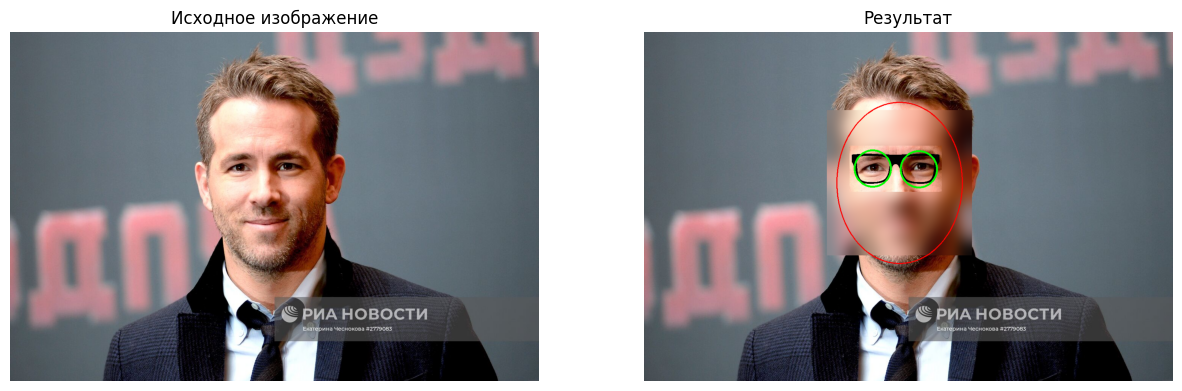

In [63]:
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

detector = FaceEyeDetector()

# Загрузка изображения
img = cv2.imread('./photo.jpg')
img2 = img.copy()

glasses_mask = cv2.imread("./glasses.png")
h_mask, w_mask = glasses_mask.shape[:2]

for det in detector.detect(img):
    x, y, w, h = det['face']
    face = img2[y:y+h, x:x+w]
    blurred_face = blur_face(face)  # предполагается, что blur_face определена

    # Обработка глаз
    if det['eye_region'] is not None:
        print(type(det['eye_region']))
        x_min, y_min, x_max, y_max = scale(det['eye_region'], 1.5)
        eye_area_h = y_max - y_min
        eye_area_w = x_max - x_min

        # Масштабируем очки
        glasses_mask_small = cv2.resize(glasses_mask, (eye_area_w, eye_area_h), interpolation=cv2.INTER_AREA)

        # Маска
        gray_mask = cv2.cvtColor(glasses_mask_small, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY_INV)
        mask_inv = cv2.bitwise_not(mask)

        # Применяем маску
        masked_mouth = cv2.bitwise_and(glasses_mask_small, glasses_mask_small, mask=mask)
        eye_area = face[y_min:y_max, x_min:x_max]
        masked_face = cv2.bitwise_and(eye_area, eye_area, mask=mask_inv)

        # Вставляем очки
        blended = cv2.add(masked_mouth, masked_face)
        blurred_face[y_min:y_max, x_min:x_max] = blended

        # (Опционально: рисуем глаза)
        for (ex, ey, ew, eh) in det['eyes']:
            cv2.circle(blurred_face,
                       center=(ex + ew // 2, ey + eh // 2),
                       radius=int(0.3 * (ew + eh)),
                       color=(0, 255, 0),
                       thickness=3)


    # Обновляем изображение
    img2[y:y+h, x:x+w] = blurred_face

    # Рисуем овал вокруг лица
    center = (x + w // 2, y + h // 2)
    axes = (int(w / 2.3), int(h / 1.8))
    cv2.ellipse(img2, center=center, axes=axes, angle=0,
                startAngle=360, endAngle=0, color=(0, 0, 255), thickness=2)

# Отображение
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Исходное изображение')
ax1.axis('off')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title('Результат')
ax2.axis('off')

pyplot.show()

80 200


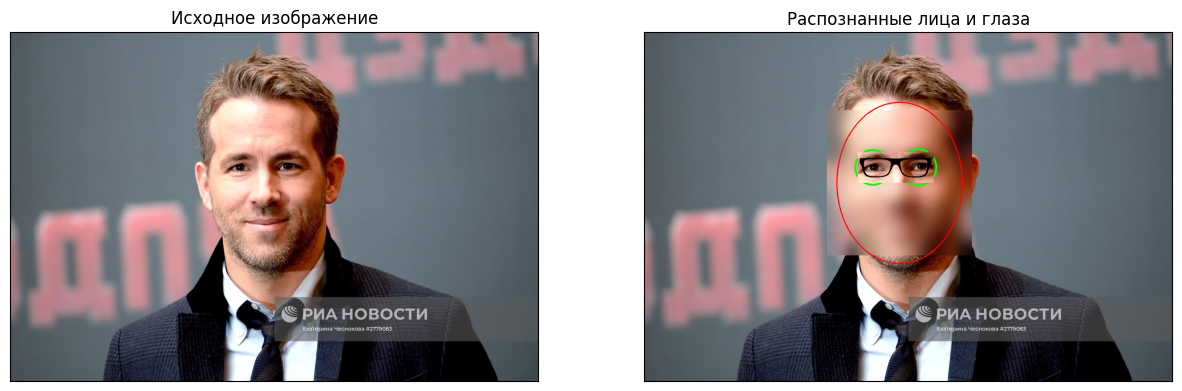

In [32]:
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

# Загрузка изображения
img = cv2.imread('./photo.jpg')
img2 = img.copy()

glasses_mask = cv2.imread("./glasses.png")
h_mask, w_mask = glasses_mask.shape[:2]

# загрузка каскада Хаара для поиска лиц
classifier_face =
# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = int(x + width/2), int(y + height/2)

    face = img2[y:y + height, x:x + width] # найденная область с лицом
    blured_face = blur_face(face) # блюрим найденую зону с лицом



    # выполнение распознавания глаз по исходному найденому лицу
    eyes = classifier_eye.detectMultiScale(face)

    x_eye_left = y_eye_left = 0
    x2_eye_right = y2_eye_right = 0

    for x_eye,y_eye,w_eye,h_eye in eyes:

        # находим крайние точки глаз, для обозначения зоны глаз
        if x_eye_left == 0 or x_eye_left > x_eye:
          x_eye_left = x_eye
          y_eye_left = y_eye

        if x_eye + w_eye > x2_eye_right:
          x2_eye_right = x_eye + w_eye
          y2_eye_right = y_eye + h_eye

        # получаем глаза с исходного лица
        eye = face[y_eye:y_eye+h_eye, x_eye:x_eye+w_eye]
        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии
        # возращаем исходные глаза заблюреному лицу
        blured_face[y_eye:y_eye+h_eye, x_eye:x_eye+w_eye] = eye
        # рисуем круг
        cv2.circle(blured_face, center, radius, color, thickness)


    # вычисляем размер области глаз
    eye_area_h, eye_area_w = y2_eye_right - y_eye_left, x2_eye_right - x_eye_left
    eye_area = face[y_eye_left:y_eye_left + eye_area_h, x_eye_left:x_eye_left+eye_area_w]
    # Маштабируем усы до размера рта
    glasses_mask_small = cv2.resize(glasses_mask, (eye_area_w, eye_area_h), interpolation=cv2.INTER_AREA)

    # Сделаем наши усы черно-белые и применим инвариантный бинарный порог, как это делали с номерами
    gray_mask = cv2.cvtColor(glasses_mask_small, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY_INV)

    # Чтобы инвертировать маску в OpenCV, мы используем функцию cv2.bitwise_not(),
    # которая выполняет побитовую операцию not над отдельными пикселями.
    # https://docs.opencv.org/2.4.13.2/modules/core/doc/operations_on_arrays.html?highlight=bitwise#bitwise-not
    mask_inv = cv2.bitwise_not(mask)

    # побитовое AND для двух изображений, результирующая - пиксели присутствующие на обоих изображениях
    masked_mouth = cv2.bitwise_and(glasses_mask_small, glasses_mask_small, mask=mask)
    #  https://docs.opencv.org/2.4.13.2/modules/core/doc/operations_on_arrays.html?highlight=bitwise#bitwise-and
    masked_face = cv2.bitwise_and(eye_area, eye_area, mask=mask_inv)

    # Объединяем рот и усы
    blured_face[y_eye_left:y_eye_left + eye_area_h, x_eye_left:x_eye_left+eye_area_w] = cv2.add(masked_mouth, masked_face)


    print(eye_area_h, eye_area_w)
    img2[y:y + height, x:x + width] = blured_face

    # рисуем овал вокруг лица
    cv2.ellipse(img2,
                center=(x2, y2),
                axes=(int(width/2.3), int(height/1.8)),
                angle=0,
                startAngle=360,
                endAngle=0,
                color=(0,0,255),
                thickness=2,
                )

    # # рисование прямоугольников
    # cv2.rectangle (img2, (x_eye_left+x, y_eye_left+y), (x2_eye_right+x, y2_eye_right+y), (0, 0, 255), 2)

    # побитовое AND для двух изображений, результирующая - пиксели присутствующие на обоих изображениях
    masked_mouth = cv2.bitwise_and(glasses_mask_small, glasses_mask_small, mask=mask)


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаза')

pyplot.show()
